In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("survey.csv")
print(data)

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

In [5]:
data_cleaned = data.copy()


In [6]:
data_cleaned.drop(columns = ['Timestamp','comments','state'],inplace = True)

Country Counts


In [7]:
country_counts = data_cleaned['Country'].value_counts()
print(country_counts)

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

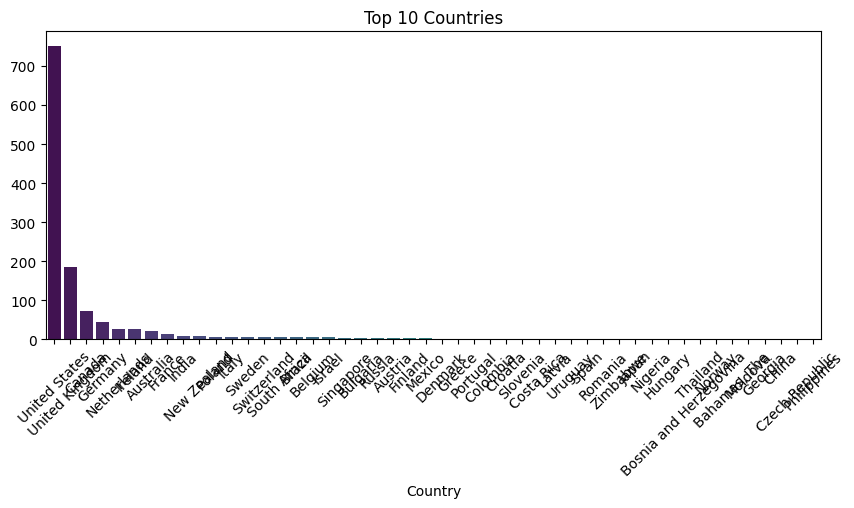

In [8]:
plt.figure(figsize=(10, 4))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Countries")
plt.show()

In [9]:
less_count_countries = country_counts[country_counts < 10].index.tolist()
data_cleaned['Country'] = data_cleaned['Country'].replace(less_count_countries, 'Others')
print(data_cleaned['Country'].value_counts())

Country
United States     751
United Kingdom    185
Others            108
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
Name: count, dtype: int64


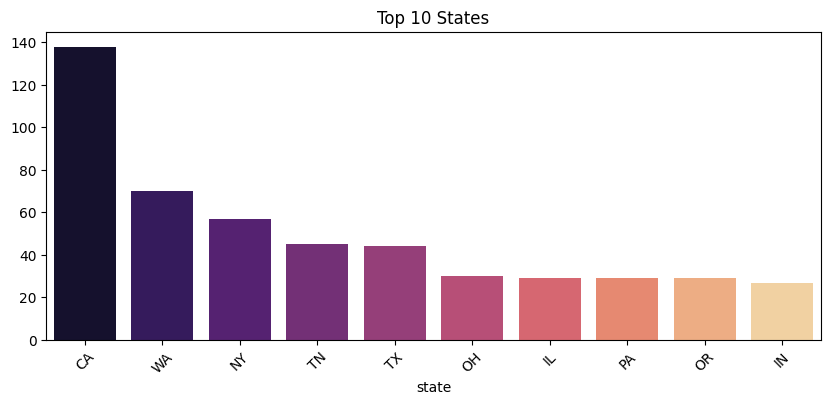

In [14]:
top_states = data["state"].value_counts().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_states.index, y=top_states.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 States")
plt.show()


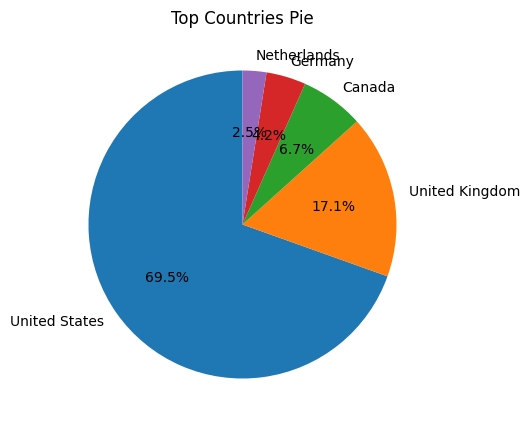

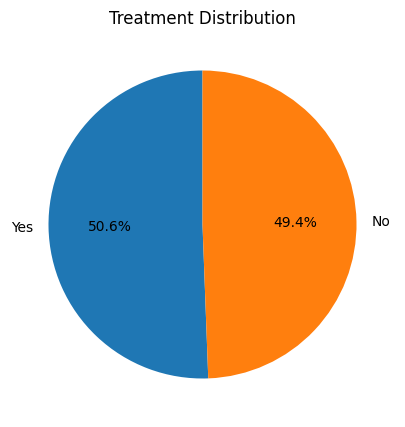

In [17]:
plt.figure(figsize=(5, 5))
data["Country"].value_counts().nlargest(5).plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Top Countries Pie")
plt.ylabel("")
plt.show()

plt.figure(figsize=(15, 5))
data["treatment"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title("Treatment Distribution")
plt.ylabel("")
plt.show()

In [7]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'male-ish', 'maile', 'mal', 'make', 'cis male']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis-female/femme', 'femail', 'cis female']:
        return 'Female'
    else:
        return 'Other'

In [8]:
data_cleaned['Gender'] = data_cleaned['Gender'].apply(clean_gender)
print(data_cleaned['Gender'].value_counts())

Gender
Male      986
Female    245
Other      28
Name: count, dtype: int64


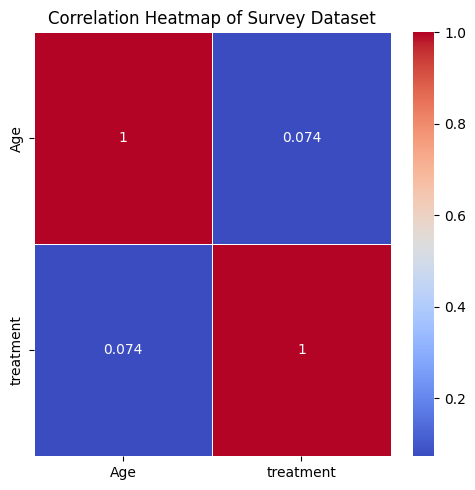

In [49]:
numeric_df = data_cleaned.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Survey Dataset")
plt.tight_layout()
plt.show()


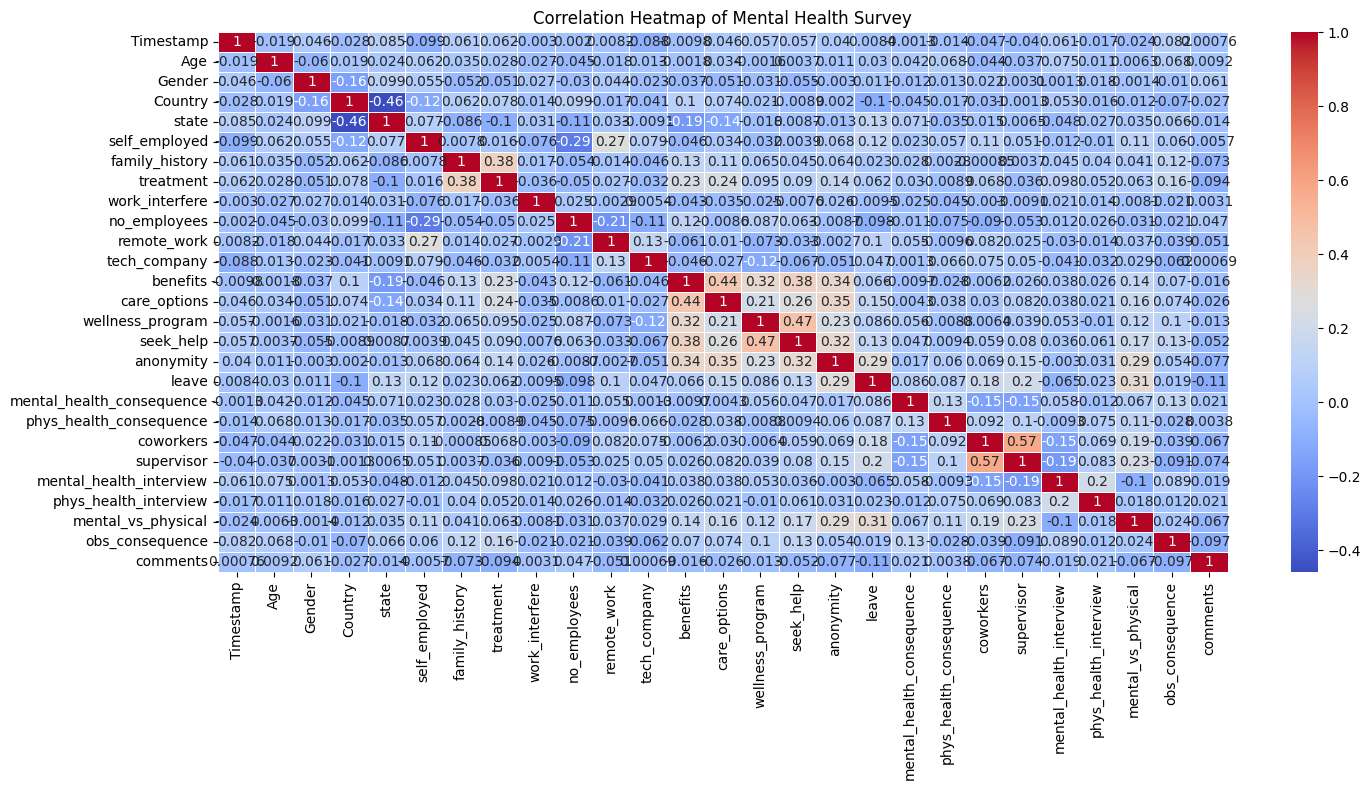

In [53]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_enc.fit_transform(data[col].astype(str))

# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Mental Health Survey")
plt.tight_layout()
plt.show()


In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [27]:
data_cleaned = data_cleaned[(data_cleaned['Age'] >= 17) & (data_cleaned['Age'] <= 80)]
print(data_cleaned['Age'].value_counts())

Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
50     6
20     6
48     6
51     5
56     4
49     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: count, dtype: int64


In [28]:
data_cleaned["self_employed"].fillna("Not specified", inplace=True)
data_cleaned["work_interfere"].fillna("Not specified", inplace=True)

In [29]:
data_cleaned.reset_index(drop=True, inplace=True)

Final Check


In [30]:
print("Missing values per column after cleaning:")
print(data_cleaned.isnull().sum())

Missing values per column after cleaning:
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [31]:
data_cleaned.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Not specified,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Not specified,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Not specified,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Not specified,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Not specified,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [32]:
# Only drop rows where 'treatment' is NaN if the mapping hasn't been applied yet.
if data_cleaned['treatment'].dtype == 'object':
    data_cleaned = data_cleaned.dropna(subset=['treatment'])

In [33]:
data_cleaned['treatment'] = data_cleaned['treatment'].map({'Yes': 1, 'No': 0})

In [34]:
data_cleaned['treatment'].isna().sum()

np.int64(0)

In [35]:
categorical_cols = data_cleaned.select_dtypes(include='object').columns.tolist()


In [36]:
print(categorical_cols)

['Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


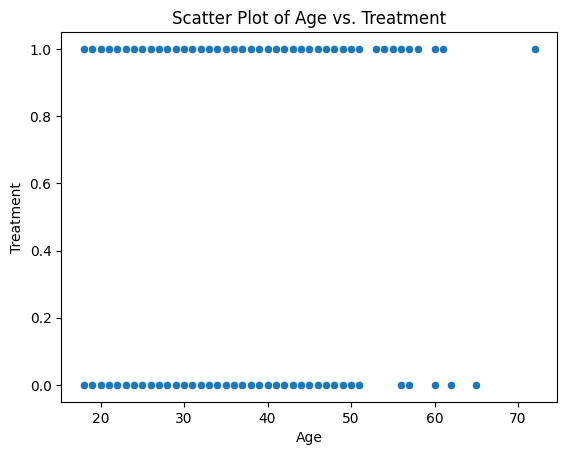

In [37]:
sns.scatterplot(data=data_cleaned, x='Age', y='treatment')
plt.title('Scatter Plot of Age vs. Treatment')
plt.xlabel('Age')
plt.ylabel('Treatment')
plt.show()

In [39]:
X = data_cleaned.drop('treatment', axis=1)
y = data_cleaned['treatment']

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [41]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

In [42]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify = y)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [46]:
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
print(round(accuracy*100,2),"%")
print(round(precision*100,2),"%")
print(round(recall*100,2),"%")
print(round(f1*100,2),"%")
print(round(roc_auc*100,2),"%")

84.06 %
82.22 %
87.4 %
84.73 %
91.3 %
